In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

# Data

In [3]:
points = [[0.71, 0.18, 2.50, 0.45, 0.03, 
           0.12, 0.30, 2.65, 0.90, 0.46], 
          [0.14, 0.23, 2.30, 0.17, 0.44,
           0.24, 0.03, 2.10, 0.92, 0.33]]

In [4]:
data = np.array(points).T
data.shape

(10, 2)

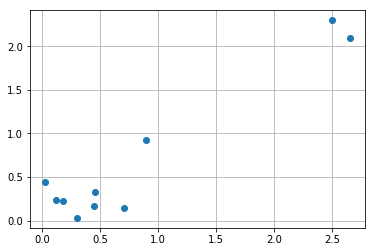

In [5]:
plt.plot(data[:, 0], data[:, 1], 'o')
plt.grid()

# Move data using mean

In [6]:
x = data[:, 0]
y = data[:, 1]

In [7]:
x_bar = round(x.mean(), 2)
x_bar

0.83

In [8]:
y_bar = round(y.mean(), 2)
y_bar

0.69

In [9]:
scaled_x = x - x_bar
scaled_x

array([-0.12, -0.65,  1.67, -0.38, -0.8 , -0.71, -0.53,  1.82,  0.07,
       -0.37])

In [10]:
scaled_y = y - y_bar
scaled_y

array([-0.55, -0.46,  1.61, -0.52, -0.25, -0.45, -0.66,  1.41,  0.23,
       -0.36])

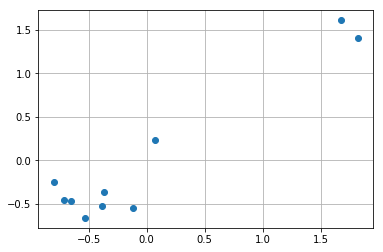

In [11]:
plt.plot(scaled_x, scaled_y, 'o')
plt.grid()

# Covariance matrix

$cov(x, y)=cov(y,x)=\Sigma_{1}^{10}\frac{(x_i-\bar{x})(y_i-\bar{y})}{10-1}$

In [12]:
cov_xy = round(np.sum(scaled_x * scaled_y) / 9, 5)
cov_xy

0.75957

$cov(x, x)=var(x)=\Sigma_{1}^{10}\frac{(x_i-\bar{x})(x_i-\bar{x})}{10-1}$

In [13]:
var_x = round(np.sum(scaled_x * scaled_x) / 9, 5)
var_x

0.9166

$cov(y, y)=var(y)=\Sigma_{1}^{10}\frac{(y_i-\bar{y})(y_i-\bar{y})}{10-1}$

In [14]:
var_y = round(np.sum(scaled_y * scaled_y) / 9, 5)
var_y

0.6942

In [15]:
np.cov(x, y, ddof=1)

array([[0.9166    , 0.75956667],
       [0.75956667, 0.6942    ]])

# Eigenvectors of covariance matrix

In [16]:
e_vals, e_vecs = np.linalg.eig(np.cov(x, y, ddof=1))

In [17]:
e_vals

array([1.57306331, 0.03773669])

In [18]:
e_vecs

array([[ 0.75658944, -0.65389022],
       [ 0.65389022,  0.75658944]])

첫 번째 eigenvect를 선택한다.

In [19]:
e_vecs[:, 0]

array([0.75658944, 0.65389022])

# Points on principal component

In [20]:
scaled_data = np.c_[scaled_x, scaled_y]
scaled_data

array([[-0.12, -0.55],
       [-0.65, -0.46],
       [ 1.67,  1.61],
       [-0.38, -0.52],
       [-0.8 , -0.25],
       [-0.71, -0.45],
       [-0.53, -0.66],
       [ 1.82,  1.41],
       [ 0.07,  0.23],
       [-0.37, -0.36]])

Scaled data를 principal components에 투영시키면 새로운 points가 생성된다.

In [21]:
new_points = np.dot(scaled_data, e_vecs[:, 0])
new_points

array([-0.45043035, -0.79257264,  2.31626762, -0.6275269 , -0.76874411,
       -0.8314291 , -0.83255995,  2.29897799,  0.20335601, -0.51533857])

Visualization

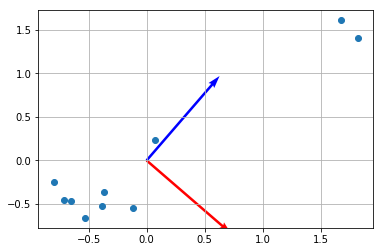

In [22]:
origin = [0], [0]
plt.plot(scaled_x, scaled_y, 'o')
plt.quiver(*origin, e_vecs[:, 0], e_vecs[:, 1], color=['r','b','g'], scale=3)
plt.grid()

In [23]:
# 두 eigenvector의 내적값은 0이다. 즉 90도 이다.
np.dot(e_vecs[:, 0], e_vecs[:, 1])

0.0

# Sklearn을 사용하여 결과를 비교해보자.

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Covariance matrix

In [25]:
pca.get_covariance()

array([[0.9166    , 0.75956667],
       [0.75956667, 0.6942    ]])

Pricipal components위로 projection된 데이터

In [26]:
pca.transform(data)

array([[-0.45043035,  0.33765737],
       [-0.79257264, -0.0769975 ],
       [ 2.31626762, -0.12611234],
       [-0.6275269 ,  0.14494823],
       [-0.76874411, -0.33396481],
       [-0.8314291 , -0.1237968 ],
       [-0.83255995,  0.15278722],
       [ 2.29897799,  0.12328908],
       [ 0.20335601, -0.12824326],
       [-0.51533857,  0.03043282]])